In [6]:
import numpy as np
import scipy.signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
nasah = pd.read_csv('data/data_fix/nasah_tkr.csv')
nasah.columns = ['no','sig','time']

In [67]:
nasah_sig = nasah['sig'][10000:10500]
nasah_no = nasah['no'][10000:11000]

def bandpass(data: np.ndarray, edges: list[float], sample_rate: float, poles: int = 5):
    sos = scipy.signal.butter(poles, edges, 'bandpass', fs=sample_rate, output='sos')
    filtered_data = scipy.signal.sosfiltfilt(sos, data)
    return filtered_data


sample_rate = 100
times = np.arange(len(nasah_sig))/sample_rate

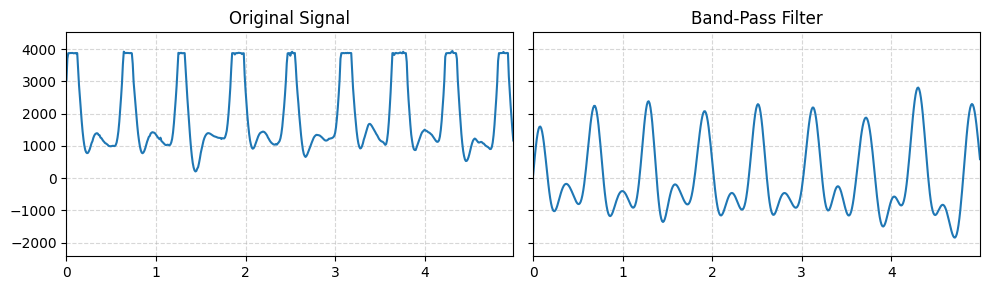

In [68]:
# Apply a 10-50 Hz high-pass filter to the original data
filtered = bandpass(nasah_sig, [1, 5], sample_rate)

# Code used to display the result
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), sharex=True, sharey=True)
ax1.plot(times, nasah_sig)
ax1.set_title("Original Signal")
ax1.margins(0, .1)
ax1.grid(alpha=.5, ls='--')
ax2.plot(times, filtered)
ax2.set_title("Band-Pass Filter")
ax2.grid(alpha=.5, ls='--')
plt.tight_layout()
plt.show()